# NOS Sentiment analysis

In this notebook we will...

1. ...explore how the website of NOS.nl works "under the surface".
2. ...extract articles that match a particular search query on the website.
3. ...run a sentiment analysis on the data
4. ...visualize the results

First we need to import some packages:

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import itertools
import matplotlib.pyplot as plt

## Exploring NOS.nl: the basics

To download articles on a specific topic we need to figure out two things:

1. We need to find the url that belongs to (leads to) a particular search result.
2. We need to find the urls of the articles in that search results.

### Urls of search results

Go to www.nos.nl and use the website's search function (the magnifying glass in the top right).

As you can see, searching for the term "Biden" brings us to the url https://nos.nl/zoeken?q=biden

Can you come up with the url that brings us to the search results for "Obama"? Enter that url in your browser and check what happens.
<details>
<summary>Answer</summary>
https://nos.nl/zoeken?q=obama
</details>
<br>

You can also search for multiple terms at once. Use the search function of the website to see what happens with the url when you do that.

If you want to search for a particular combinaton and order of words, you can use quotation marks. Bijv.: https://nos.nl/zoeken?q="verenigde+staten".



## Building the dataframe

The code starts doing the same thing we already did: it collects the urls of the articles that we want to analyze. But it does a bit more than that:

1. It searches for articles from a particular starting date until now.
2. It cycles through the different pages of the search results, so that it does not just collect the urls of the first page of the search results, the all the urls on all the pages of the search results.
3. It does not just collect the urls of the articles, it also collects the title of the articles, the date of the articles and the text of the articles, and it saves this data in a dataframe (that we can use for the sentiment analysis).


In [20]:
# Vul hier je zoekterm(en) in en de datum vanaf je wil zoeken (dus resultaten zijn datum - nu)
termen = "Vervang dit Sven" # als de volgorde belangrijk is, gebruik dan "Vervang+dit+Sven"
searchdate = "2020-01-01" # Op Jaar - maand - dag basis



# Voor nieuwe resultaten, run de code hierboven opnieuw voor andere termen / searchdate
# Run daarna de code hieronder om de artikelen op te halen en de data te bekijken

# Tip: Het codeblok hieronder geeft een nummer terug, dat zijn het aantal artikelen die gevonden zijn over het onderwerp voor
# de gegeven data. Als dit getal erg groot is, duurt het dus ook erg lang voordat alles geanalyseerd is.

#############################################

In [21]:
# Verzamel URL van elk artikel
pagelinks = []  # aanmaken leeg object om met links te vullen
urlbase = "https://nos.nl/zoeken?q="  # basis URL 
datebase = "&date="
url = urlbase + termen + datebase + searchdate

while True:  # run loop terwijl IF statement TRUE is
    page = requests.get(url)  # benader URL
    soup = BeautifulSoup(page.content, 'html.parser')  # download HTML-code
    weblinks = soup.find_all("a", {"class": "search-results__link"})  # verzamel alle HTML-code van de artikelen
    pl =[]
    for i in range(len(weblinks)):   # voor elke HTML-code die een artikellink bevat: 
            pl.append('http://nos.nl'+ weblinks[i].get('href'))   # sla alle links uit de HTML-code op
    pagelinks.append(pl)  # voeg deze toe aan het object pagelinks
    if soup.find_all("span", {"class": "js-update link-hover"}):  # run loop terwijl dit TRUE is
        next_page = soup.find("span", {"class": "js-update link-hover"})  # verzamel de HTML-code van de volgende pagina
        url = "https://nos.nl" + next_page.get('data-url') + datebase + searchdate  # haal de url eruit en voeg samen tot een link
    else:
        break

pagelinks_flat = list(itertools.chain(*pagelinks))  # flatten de list

# print the last five results
print(len(pagelinks_flat))
pagelinks_flat[:5]

90


[u'http://nos.nl/collectie/13826/artikel/2323787-michael-bloomberg-fel-aangevallen-in-zijn-eerste-democratische-debat',
 u'http://nos.nl/artikel/2324066-ook-democraat-bernie-sanders-gewaarschuwd-voor-russische-bemoeienis',
 u'http://nos.nl/artikel/2324077-wekdienst-22-2-afgeblazen-carnavalsoptochten-en-herdenking-vergisbombardement',
 u'http://nos.nl/video/2324093-bernie-sanders-blijf-weg-van-de-amerikaanse-verkiezingen',
 u'http://nos.nl/liveblog/2337766-ook-onterechte-coronavaststellingen-in-lelystad-frankrijk-verder-open']

In [22]:
# Verzamel titel van elk artikel
title = []
url = urlbase + termen + datebase + searchdate

while True:
    page = requests.get(url) 
    soup = BeautifulSoup(page.content, 'html.parser')
    titles = soup.find_all("h3", {"class": "search-results__title"})  # aangepast naar titel node en class
    tt = []
    for i in range(len(titles)):    
          tt.append(titles[i].get_text())
    title.append(tt)
    if soup.find_all("span", {"class": "js-update link-hover"}):
        next_page = soup.find("span", {"class": "js-update link-hover"})
        url = "https://nos.nl" + next_page.get('data-url') + datebase + searchdate
    else:
        break
        
title_flat = list(itertools.chain(*title))
title_flat[:5]

[u'Michael Bloomberg fel aangevallen in zijn eerste Democratische debat',
 u'Ook Democraat Bernie Sanders gewaarschuwd voor Russische bemoeienis',
 u'Wekdienst 22/2: afgeblazen carnavalsoptochten en herdenking vergisbombardement',
 u"Bernie Sanders: 'Blijf weg van de Amerikaanse verkiezingen'",
 u'Ook onterechte coronavaststellingen in Lelystad \u2022 Frankrijk verder open']

In [23]:
# Verzamel datum van elk artikel
date = []
url = urlbase + termen + datebase + searchdate

while True:
    page = requests.get(url) 
    soup = BeautifulSoup(page.content, 'html.parser')
    time = soup.find_all("time", {"class": "search-results__time"})  # aangepast naar datum node en class
    dt = []
    for i in range(len(time)):    
          dt.append(time[i].get('datetime'))
    date.append(dt)
    if soup.find_all("span", {"class": "js-update link-hover"}):
        next_page = soup.find("span", {"class": "js-update link-hover"})
        url = "https://nos.nl" + next_page.get('data-url') + datebase + searchdate
    else:
        break
        
date_flat = list(itertools.chain(*date))
date_flat[:5]

[u'2020-02-20T04:03:36+0100',
 u'2020-02-22T03:11:40+0100',
 u'2020-02-22T08:17:52+0100',
 u'2020-02-22T10:09:46+0100',
 u'2020-06-20T04:40:11+0200']

In [25]:
# Verzamel de tekst van elk artikel
thearticle = []
iter=0
for link in pagelinks_flat:    
    paragraphtext = []    
    url = link
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')    
    if "video" in link:
        articletext = soup.find_all('p', {"class": 'videoDescription_bAtNIfDM'})
    else:
        articletext = soup.find_all('p', {"class":'text_3v_J6Y0G'})
    for paragraph in articletext:
        text = paragraph.get_text()
        paragraphtext.append(text)        
    thearticle.append(paragraphtext)
    iter=iter+1
    if iter % 10 == 0:
        print(f"{iter} out of {len(pagelinks_flat)}")
    
thearticle[0]

SyntaxError: invalid syntax (<ipython-input-25-7372e09517aa>, line 19)

In [26]:
# Lists samenvoegen in dataframe
df = pd.DataFrame(
    {'datetime': date_flat,
     'pagelink': pagelinks_flat,
     'title': title_flat,
     'text': thearticle
    })

df.head(2)

NameError: name 'thearticle' is not defined

In [50]:
# Liveblogs eruit filteren
df = df[df["pagelink"].str.contains("liveblog")==False].reset_index(drop=True)

In [51]:
# Leestekens verwijderen, hoofdletters vervangen door kleine letters en titel en tekst samenvoegen
df['pure_title'] = df['title'].str.replace('[^A-Za-z0-9 ]+', ' ').str.lower()
df['pure_text'] = df['text'].astype(str).str.replace('[^A-Za-z0-9 ]+', ' ').str.lower()
df['title_text'] = df['pure_title'] + df['pure_text']
df.head()

/tmp/ipykernel_845275/1331587987.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['pure_title'] = df['title'].str.replace('[^A-Za-z0-9 ]+', ' ').str.lower()
/tmp/ipykernel_845275/1331587987.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['pure_text'] = df['text'].astype(str).str.replace('[^A-Za-z0-9 ]+', ' ').str.lower()


datetime  \
0  2022-01-18T14:01:17+0100   
1  2021-12-10T20:56:59+0100   
2  2021-12-08T22:32:01+0100   
3  2021-11-07T17:32:54+0100   
4  2021-07-19T07:32:25+0200   

                                            pagelink  \
0  http://nos.nl/video/2413563-kamerleden-verzoek...   
1  http://nos.nl/artikel/2408990-kamervoorzitter-...   
2  http://nos.nl/artikel/2408747-bij1-dient-klach...   
3  http://nos.nl/artikel/2404730-quinsy-gario-zeg...   
4  http://nos.nl/artikel/2389910-quinsy-gario-num...   

                                               title  \
0  Kamerleden verzoeken Kamervoorzitter dringend ...   
1  Kamervoorzitter in brief aan Simons: regels ge...   
2  Bij1 dient klacht in tegen ondervoorzitter Tel...   
3  Quinsy Gario zegt lidmaatschap Bij1 op: 'Het h...   
4  Quinsy Gario, nummer 2 van Bij1, uit partij gezet   

                                                text  \
0  [\n      Onder anderen Klaver (GroenLinks) en ...   
1  [Kamervoorzitter Vera Bergkamp heeft in een br...   
2  [Bij1 heeft een klacht ingediend tegen ondervo...   
3  [Quinsy Gario, de voormalige nummer twee op de...   
4  [Het partijbestuur van Bij1 heeft Quinsy Gario...   

                                          pure_title  \
0  kamerleden verzoeken kamervoorzitter dringend ...   
1  kamervoorzitter in brief aan simons  regels ge...   
2  bij1 dient klacht in tegen ondervoorzitter tel...   
3  quinsy gario zegt lidmaatschap bij1 op   het h...   
4  quinsy gario  nummer 2 van bij1  uit partij gezet   

                                           pure_text  \
0   n      onder anderen klaver  groenlinks  en s...   
1   kamervoorzitter vera bergkamp heeft in een br...   
2   bij1 heeft een klacht ingediend tegen ondervo...   
3   quinsy gario  de voormalige nummer twee op de...   
4   het partijbestuur van bij1 heeft quinsy gario...   

                                          title_text  
0  kamerleden verzoeken kamervoorzitter dringend ...  
1  kamervoorzitter in brief aan simons  regels ge...  
2  bij1 dient klacht in tegen ondervoorzitter tel...  
3  quinsy gario zegt lidmaatschap bij1 op   het h...  
4  quinsy gario  nummer 2 van bij1  uit partij ge...

# Sentimentanalyse

In this part of the notebook, we will run the sentiment analysis. In it's most basic form, a sentiment analysis basically just counts the number of words that are generally believed to be negative, and words that are generally believed to be positive. Have a look at the text files for negative and positive words in the folder ../../data/processed/. Do you agree that they are negative/positive?

It is important to realize that an article about a politician with a lot negative words is not necessarily an article that is negative about that politician. It could just as well be an article that condemns people for inappropriately criticizing that politician. It is always important to remain critical of the output of our code!

In [52]:
# Inladen van dataset met positieve en negatieve woorden
# (Chen, Y., & Skiena, S., 2014. Building Sentiment Lexicons for All Major Languages. In ACL (2) (pp. 383-389))
negative = pd.read_csv('../../data/processed/negative_words_nl.txt', header=None).rename(columns={0: 'word'})
negative['negative'] = 1
positive = pd.read_csv('../../data/processed/positive_words_nl.txt', header=None).rename(columns={0: 'word'})
positive['positive'] = 1

In [53]:
# Woorden uit txt bestand samenvoegen in een dataframe 
words = positive.append(negative).fillna(0)
words

word  positive  negative
0          eerste       1.0       0.0
1            naam       1.0       0.0
2            waar       1.0       0.0
3             wel       1.0       0.0
4           zoals       1.0       0.0
...           ...       ...       ...
2465   stereotiep       0.0       1.0
2466    smeekbede       0.0       1.0
2467  irrationaal       0.0       1.0
2468       gallen       0.0       1.0
2469  erbarmelijk       0.0       1.0

[3969 rows x 3 columns]

In [54]:
# Tekst opsplitsen in woorden
df_sentiment = df[['title_text']]
df_sent = df_sentiment['title_text'].str.split(' ', expand=True).stack().reset_index(level=0)
df_sent = df_sent.rename(columns={0: 'word'})
df_sent.head()

level_0             word
0        0       kamerleden
1        0        verzoeken
2        0  kamervoorzitter
3        0         dringend
4        0               om

In [55]:
# df_sent inner joinen met words en groeperen per artikel
join = df_sent.merge(words, how='inner', on='word')
join_sum = join.groupby('level_0')[["positive", "negative"]].sum()
join_sum.head()

positive  negative
level_0                    
0             0.0       4.0
1             8.0      13.0
2            14.0      31.0
3             6.0      18.0
4            15.0      36.0

In [56]:
join_sum.describe()

positive    negative
count  184.000000  184.000000
mean    13.630435   20.619565
std     12.485373   15.038633
min      0.000000    0.000000
25%      5.000000   10.000000
50%     11.000000   18.000000
75%     18.000000   28.000000
max     69.000000   78.000000

In [57]:
# Alles samenvoegen in data
data = df.merge(join_sum, left_index=True, right_index=True, how='left')
data = data.drop(columns=['title', 'text', 'pure_title', 'pure_text'])
data.head()

datetime  \
0  2022-01-18T14:01:17+0100   
1  2021-12-10T20:56:59+0100   
2  2021-12-08T22:32:01+0100   
3  2021-11-07T17:32:54+0100   
4  2021-07-19T07:32:25+0200   

                                            pagelink  \
0  http://nos.nl/video/2413563-kamerleden-verzoek...   
1  http://nos.nl/artikel/2408990-kamervoorzitter-...   
2  http://nos.nl/artikel/2408747-bij1-dient-klach...   
3  http://nos.nl/artikel/2404730-quinsy-gario-zeg...   
4  http://nos.nl/artikel/2389910-quinsy-gario-num...   

                                          title_text  positive  negative  
0  kamerleden verzoeken kamervoorzitter dringend ...       0.0       4.0  
1  kamervoorzitter in brief aan simons  regels ge...       8.0      13.0  
2  bij1 dient klacht in tegen ondervoorzitter tel...      14.0      31.0  
3  quinsy gario zegt lidmaatschap bij1 op   het h...       6.0      18.0  
4  quinsy gario  nummer 2 van bij1  uit partij ge...      15.0      36.0

In [58]:
# Verschil berekenen
data['verschil'] = data['positive'] - data['negative']

In [59]:
# Splitsing joinen met data
df3 = df[['datetime']]
data = data.merge(df3, on = 'datetime', how='left')
data.head(3)

datetime  \
0  2022-01-18T14:01:17+0100   
1  2021-12-10T20:56:59+0100   
2  2021-12-08T22:32:01+0100   

                                            pagelink  \
0  http://nos.nl/video/2413563-kamerleden-verzoek...   
1  http://nos.nl/artikel/2408990-kamervoorzitter-...   
2  http://nos.nl/artikel/2408747-bij1-dient-klach...   

                                          title_text  positive  negative  \
0  kamerleden verzoeken kamervoorzitter dringend ...       0.0       4.0   
1  kamervoorzitter in brief aan simons  regels ge...       8.0      13.0   
2  bij1 dient klacht in tegen ondervoorzitter tel...      14.0      31.0   

   verschil  
0      -4.0  
1      -5.0  
2     -17.0

In [60]:
# Datetime gebruiken zodat het als een datum wordt gezien
data['datetime'] = data['datetime'].str.slice(0, -14)
data['datetime'] = pd.to_datetime(data['datetime'])
data.head(3)

datetime                                           pagelink  \
0 2022-01-18  http://nos.nl/video/2413563-kamerleden-verzoek...   
1 2021-12-10  http://nos.nl/artikel/2408990-kamervoorzitter-...   
2 2021-12-08  http://nos.nl/artikel/2408747-bij1-dient-klach...   

                                          title_text  positive  negative  \
0  kamerleden verzoeken kamervoorzitter dringend ...       0.0       4.0   
1  kamervoorzitter in brief aan simons  regels ge...       8.0      13.0   
2  bij1 dient klacht in tegen ondervoorzitter tel...      14.0      31.0   

   verschil  
0      -4.0  
1      -5.0  
2     -17.0

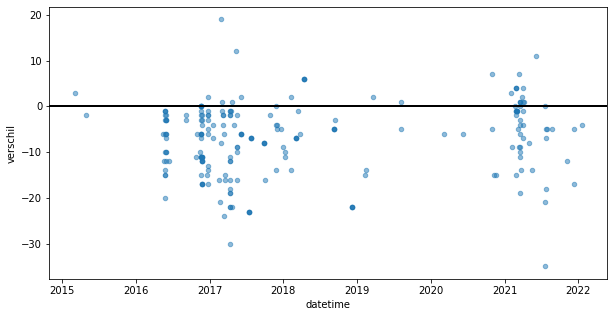

In [61]:
# Plot verschil positief negatief
plt.rcParams["figure.figsize"] = (10, 5)
data.plot.scatter(x="datetime", y="verschil", alpha=0.5)
plt.axhline(y=0, linewidth=2, color='black')

In [66]:
# Gemiddelde per maand
data_mean = data.groupby(pd.Grouper(key='datetime',freq='M')).mean().reset_index()
# Aantal artikelen per maand
data_count = data.groupby(pd.Grouper(key='datetime',freq='M')).count().reset_index()
data_count = data_count[['datetime', 'pagelink']].rename(columns={'pagelink': 'number_of_articles'})
# Samenvoegen
data_mean_count = data_mean.merge(data_count, on = 'datetime', how='left')
data_mean_count.head(3)

datetime  positive  negative  verschil  number_of_articles
0 2015-03-31      11.0       8.0       3.0                   1
1 2015-04-30       NaN       NaN       NaN                   0
2 2015-05-31       4.0       6.0      -2.0                   1

<AxesSubplot:xlabel='datetime', ylabel='number_of_articles'>

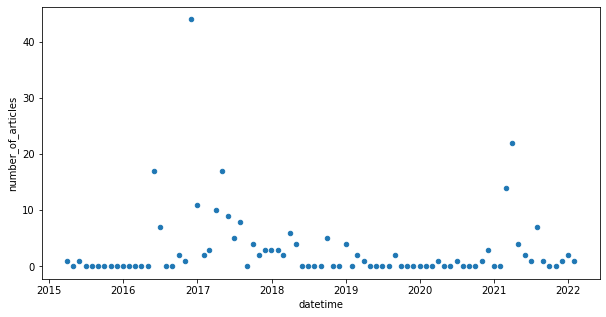

In [67]:
# Plot aantal artikelen per maand
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count.plot.scatter(x="datetime", y='number_of_articles')